In [1]:
from model import IntersectionModel

model = IntersectionModel()
model.run_model(200)

model_data = model.datacollector.get_model_vars_dataframe()


In [2]:
# Save the model data to a csv file
model_data.to_csv('model_data.csv')

Total vehicles:  8
Emergency vehicles:  2


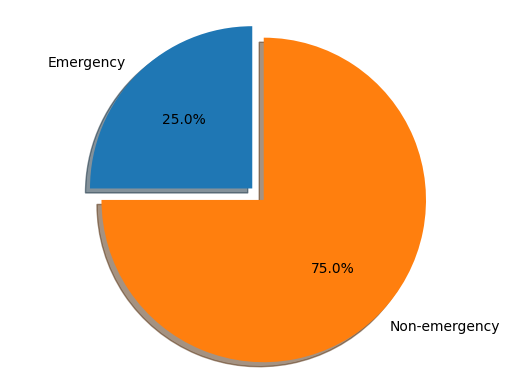

In [3]:
import matplotlib.pyplot as plt

# Emergency vehicles vs. non-emergency vehicles
total_vehicle = model_data['Vehicle'][0]
print("Total vehicles: ", total_vehicle)

emegergency_vehicles = model_data['Emergency'][0]
print("Emergency vehicles: ", emegergency_vehicles)

non_emergency_vehicles = total_vehicle - emegergency_vehicles

# Plot the data
labels = 'Emergency', 'Non-emergency'
sizes = [emegergency_vehicles, non_emergency_vehicles]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



Text(0, 0.5, 'Collisions')

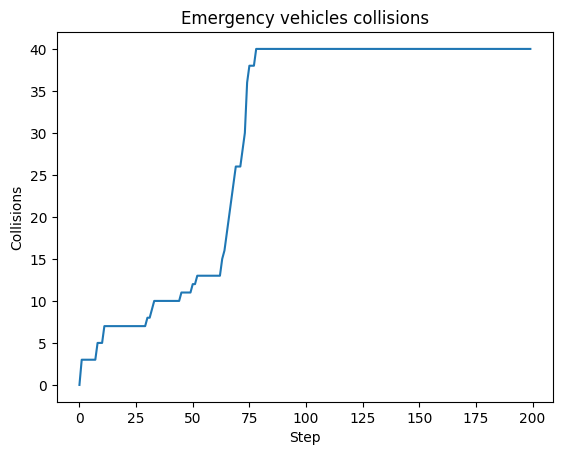

In [4]:
# Emergency vehicles collisions
collisions = model_data['Emergency_collisions']

# Plot the collisions
plot = collisions.plot(title='Emergency vehicles collisions')
plot.set_xlabel('Step')
plot.set_ylabel('Collisions')

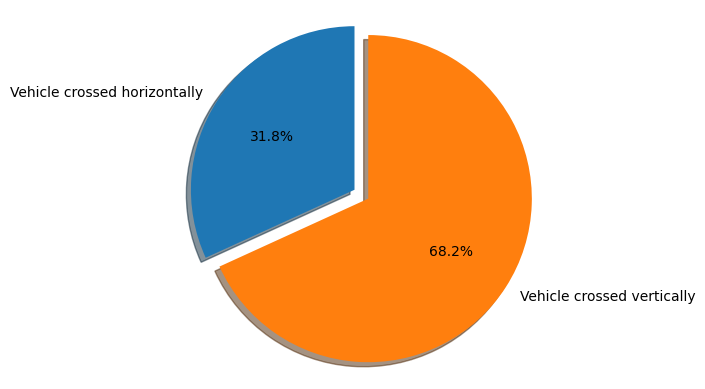

In [5]:
# Times each vehicle crossed the intersection by direction
times_crossed_left = model_data['Vehicles_crossed_left']
times_crossed_up = model_data['Vehicles_crossed_up']
times_crossed_down = model_data['Vehicles_crossed_down']
times_crossed_right = model_data['Vehicles_crossed_right']

horizontal = times_crossed_left + times_crossed_right
vertical = times_crossed_up + times_crossed_down

# Count the number of vehicles that crossed the intersection
total_horizontal = horizontal.sum()
total_vertical = vertical.sum()

# Compare the number of vehicles that crossed the intersection vertically and horizontally
# Plot in a bar chart
labels = 'Vehicle crossed horizontally', 'Vehicle crossed vertically'
sizes = [total_horizontal, total_vertical]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

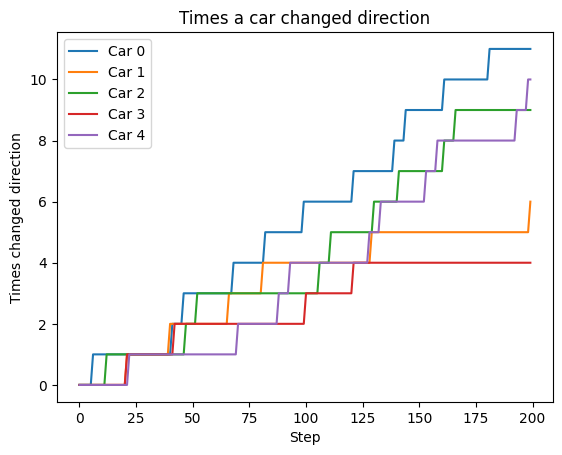

In [6]:
# Times a car changed direction
times_changed_direction_0 = model_data['Car0_direction']
times_changed_direction_1 = model_data['Car1_direction']
times_changed_direction_2 = model_data['Car2_direction']
times_changed_direction_3 = model_data['Car3_direction']
times_changed_direction_4 = model_data['Car4_direction']

# Plot the data of each car in one graph
plot = times_changed_direction_0.plot(title='Times a car changed direction')
times_changed_direction_1.plot(ax=plot)
times_changed_direction_2.plot(ax=plot)
times_changed_direction_3.plot(ax=plot)
times_changed_direction_4.plot(ax=plot)
plot.set_xlabel('Step')
plot.set_ylabel('Times changed direction')

# Lengends
plt.legend(['Car 0', 'Car 1', 'Car 2', 'Car 3', 'Car 4'])

# Batch runner